# Labjournaal BM
## General
Template for labjournaal. See https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html for options to use markdown.

**Name:**                           Jesse Dijkzeul

**Title of the experiment:**        Experimentele meeting van de Boltzmann constante

**Starting date:**                  12.11.2025

**Expected enddate:**               12.11.2025

**Partner:**                        Pim van Beers

**Goal of the experiment:**         Meeting van de Boltzmann constant door de spanning over een Diode

**Research question:**              Hoe groot is de Boltzmann constante

**Expectations or Hypothesis:**  

**Desired accuracy:**  




In [1]:
#import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit 

# Preparation
 


**Assignments:**  

**Method:**  
**Theory:**  
**Independent variable:**  
q  = -1.602 $\cdot$ 10 $^{-19}$ C (Lading van een electron)

I $\_{0}$ = []A (Sperstroom)

n  = 2.0 $\pm$ 0.1 (Idealiteitsfactor)

T  $\approx$ 295 K (Temperatur, wij benaderen het door de kamertemperatuur)

**Dependent variable:**  
U $\_{Diode}$ (Spanning over de diode)
I (Stroom over de diode)

**Controlled variablen:**  
**Measurement instruments \& Settings:**  
**Procedure:**  
**Setup(drawing or picture):**  
**Notes:**  
**About accuracy:**  

u(q) : (negeerbaar)

u(I $\_{0}$) =

u(n) = 0.1

u(T) = 3 K


# Execution

In [62]:
## Measurements: Explain the names of variables provide only raw data in np.arrays!
# Arrays met Meetdata

R_P = np.array([10,100,330,330,470,1000,4700,10000,10000,33000])

R_312_1 = np.array([10.5,100.3,329,325,470,990,4700,10000,10020,33120])   #R_D_'DDM'_'Snoernummer' -> Snoernummer 1: korte snoer, 2 lange snoer
R_512_1 = np.array([9.87,100.186,328.93,325.31,469.43,994.72,4697,9994.7,10015.4,33105])

R_1 = R_512_1[7]
R_2 = R_512_1[8]
R_3 = R_512_1[5]

#R_312_2 = np.array([])
#R_512_2 = np.array([])

U_source = np.array([1.19,3,4,5,6,7,9,10,11,18,2,2.5,1.5,3.5,15,13.5])
U_R1 = np.array([0.000266,0.007026,0.02731,0.06832,0.124482,0.188814,0.33009,0.40413,0.47956,1.02675,0.001280,0.003083,0.000494,0.014522,0.78922,0.67183])


# constantes

q = 1.602*10**(-19)
n = 2
T = 295


**Observations:**  
**Notes:**  

# Processing
**Description of processing of raw data into scientific evidence:**


In [ ]:
##Data processing and analysis:
#onzekerheden
u_n= 0.1
u_T= 3

u_512_rdg = 0.00015
u_512_rng = 0.00003
u_512_dgt = 0

u_312_rdg = 0.007
u_312_rng = 0
u_312_dgt = 1

u_source_rdg = 0.5
u_source_rng = 0
u_source_dgt = 3

def u_meeting(u_rdg,u_rng,u_dgt,rdg,rng,dgt):
    return u_rdg*rdg+u_rng*rng+u_dgt*dgt

# meeting voor klijnste weerstand

#rng R1 = 20000
#rng R2 = 20000
#rng R3 = 2000

u_R1 = u_meeting(u_512_rdg,u_512_rng,u_512_dgt,R_1,20000,0)

u_R2 = u_meeting(u_512_rdg,u_512_rng,u_512_dgt,R_2,20000,0)

u_R3 = u_meeting(u_512_rdg,u_512_rng,u_512_dgt,R_3,2000,0)

u_U_source = u_meeting(u_312_rdg,u_312_rng,u_312_dgt,U_source,0,0.01)
print(u_U_source)

#Range 200mv U<200mV
#Range 2Vmv U>200mV

u_U_R1 = u_meeting(u_512_rdg,u_512_rng,u_512_dgt,U_R1,2000,0)



[0.01833 0.031   0.038   0.045   0.052   0.059   0.073   0.08    0.087
 0.136   0.024   0.0275  0.0205  0.0345  0.115   0.1045 ]


In [45]:
##Data processing and analysis:
# spanning over Diode

def U_Diode(U_source,U_R1,R_2,R_3):
    return ((R_3*U_source)/(R_3+R_2))-U_R1


U_D = U_Diode(U_source,U_R1,R_2,R_3)

# stroom over Diode

def I_Diode(R_1,U_R1):
    return U_R1/R_1

I_D= I_Diode(R_1,U_R1)

In [ ]:
##Data processing and analysis:
#curve_fit aanmaken

def I_Dio(U,I0,kB):
    y= I0*(np.exp((1.602*10**(-19)*U)/(2*kB*295.15))-1)
    return y

popt,pcov= curve_fit(I_Dio,U_D,I_D)
print(popt)

#Testarray van de spanning
U_T= np.arange(0,0.6,0.01)

[0.e+00 1.e-05]


C:\Users\Jesse\AppData\Local\Temp\ipykernel_14816\1552539900.py:8: OptimizeWarning: Covariance of the parameters could not be estimated
  popt,pcov= curve_fit(I_Dio,U_D,I_D,p0=(0,0.00001))


<>:9: SyntaxWarning: invalid escape sequence '\_'
<>:9: SyntaxWarning: invalid escape sequence '\_'
C:\Users\Jesse\AppData\Local\Temp\ipykernel_14816\1595612006.py:9: SyntaxWarning: invalid escape sequence '\_'
  plt.xlabel('$U\_diode (V)$')


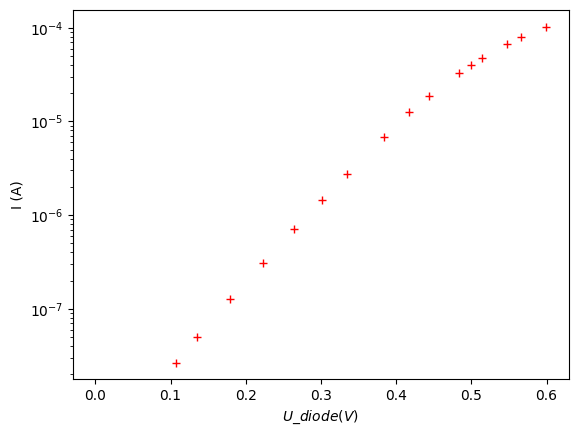

In [ ]:
##Data processing and analysis:
# log(I) over U_D plot aanmaken

plt.figure()

plt.errorbar(U_D,I_D,yerr=,xerr=)
plt.plot(U_D,I_D,'r.', label='Meetpunten')

plt.plot(U_T,I_Dio(U_T,*popt),'--', label='curve_fit')

plt.xlabel('$U\_diode (V)$')
plt.ylabel('I (A)')

plt.yscale('log')

plt.show()

In [ ]:
##Data processing and analysis:


**Describing the pattern in the processed data:**  


In [ ]:
#Calculations of e.a. measurement uncertainties, and providing final answers.


**Notes:**  

# Discussion



# Conclusion

# Additional notes, remarks, explanations, thoughts etc